In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['science', 'notebook', 'grid', 'dark_background'])
from scipy.linalg import eigh_tridiagonal

### Numeric Solution of Schrodinger's Equation in 1D
$$
-\frac{\hbar^2}{2m}\frac{d^2\psi(x)}{dx^2} + V(x)\psi(x) = E\psi(x)
$$


$$
V(x) = 
    \left\{
    \begin{array}{lr}
        V(x)\;\;(arbitrary), \;\;\;\;\;\;\;\;\;0 \leq x \leq a\\
        \infty, \;\;\;\;\;\;\;\; otherwise
    \end{array}
\right\}
$$
Hence,
$$
\psi(0) = \psi(L) = 0
$$
To make everything dimensionless, let us choose some common physics conventions:
- $\hbar = 1$  
So, $$-\frac{1}{2}\frac{d^2\psi(x)}{dx^2} + mV(x)\psi(x) = mE\psi(x)$$
- $x$ has dimensions of length, so we make the substitution $y = \frac{x}{L}$  
So, 
 $$-\frac{1}{2}\frac{d^2\psi}{dy^2} + mL^2V(y)\psi = mL^2E\psi$$
 $$\psi(y = 0) = \psi(y = 1) = 0$$
- So we take $mL^2V$ as a whole

The **Second Derivative** at a point is given as 
$$
\frac{d^2f}{dx^2}_{x = j\Delta x} = \frac{f_{j+1} - 2f_j + f_{j-1}}{\Delta x^2}, \;\; where \;\;f_j = f(j\Delta x)
$$
So, our equation becomes:
$$
\frac{1}{2} \frac{\psi_{j+1} - 2\psi_j + \psi_{j-1}}{\Delta y^2} + mL^2V_j\psi_j = mL^2 E\psi_j
$$
which after some manipulation becomes:
$$
-\frac{1}{2\Delta y^2}\psi_{j+1} + \Bigg(\frac{1}{\Delta y^2} + mL^2V_j \Bigg)\psi_j - \frac{1}{2\Delta y^2}\psi_{j-1} = mL^2E\psi_j
$$
This is essentially a large system of linear equations:
- $$\frac{1}{2\Delta y^2}\psi_{2} + \Bigg(\frac{1}{\Delta y^2} + mL^2V_1 \Bigg)\psi_1 - \frac{1}{2\Delta y^2}\psi_{0} = mL^2E\psi_1$$
- $$\frac{1}{2\Delta y^2}\psi_{3} + \Bigg(\frac{1}{\Delta y^2} + mL^2V_2 \Bigg)\psi_2 - \frac{1}{2\Delta y^2}\psi_{1} = mL^2E\psi_2$$
- $$ \frac{1}{2\Delta y^2}\psi_{N} + \Bigg(\frac{1}{\Delta y^2} + mL^2V_{N-1} \Bigg)\psi_{N-1} - \frac{1}{2\Delta y^2}\psi_{N-2} = mL^2E\psi_{N-1}$$

So, we can write our eigen value matrix
$$
\left[ \begin{array}{cc}
\frac{1}{\Delta y^2} + mL^2V_1 & -\frac{1}{2\Delta y^2}  & 0 & 0..\\
-\frac{1}{2\Delta y^2} & \frac{1}{\Delta y^2} + mL^2V_2 & -\frac{1}{2\Delta y^2} 0..\\
... & ... & ... & -\frac{1}{2\Delta y^2} \\
...0 & 0 & -\frac{1}{2\Delta y^2} & \frac{1}{\Delta y^2} + mL^2 V_{N-1}
\end{array} \right]
%
\left[ \begin{array}{cc}
\psi_1 \\
\psi_2 \\
...\\
\psi_{N-1}
\end{array} \right]
% 
= mL^2E
\left[ \begin{array}{cc}
\psi_1 \\
\psi_2 \\
...\\
\psi_{N-1}
\end{array} \right]
$$
Where,
$$
\psi_0 = \psi_N = 0
$$
**Note:** This is a tridiagonal $(N-1) \times (N-1)$ Matrix

In [2]:
N = 4000 # Number of points where we want to solve our matrix
dy = 1/N
y = np.linspace(-10, 10, N+1) # N+1 points as psi goes from psi_1 to psi_N and psi_0 !! 

**Define our "effective potential" $mL^2V$**  
We are using a harmonic potential 
$$
V(x) = \text{step potential}
$$

In [11]:
def mL2V(y):
    mL2 = 10000 
    ''' The bigger we choose our mL2, the bigger our region expands.
    Sp, it's like an infinite region with a single potential, here the
    harmonic potential.
    '''

    return np.zeros(N + 1)

**Define the main diagonals and the offset diagonals**  
Please refer to the eigen value equation above

In [12]:
main_diag = 1/dy**2 + mL2V(y = y)[1:-1] 
# We don't have psi_0 and psi_N so we need N-1 points

offset_diag = -1/(2*dy**2) * np.ones(len(main_diag) - 1) 
# Same value repeated N-2 times

**Get eigen values and eigenvectors**

In [13]:
w, v = eigh_tridiagonal(main_diag, offset_diag)

**Plotting**

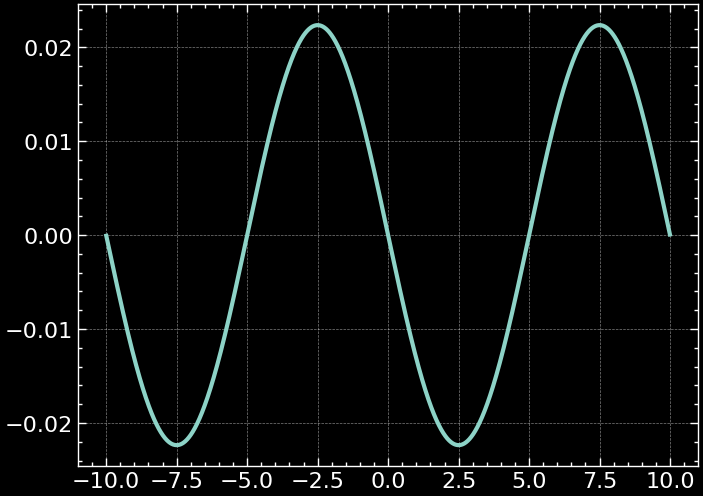

In [14]:
plt.plot(y[1:-1], v.T[3], lw = 3, label = "First State")


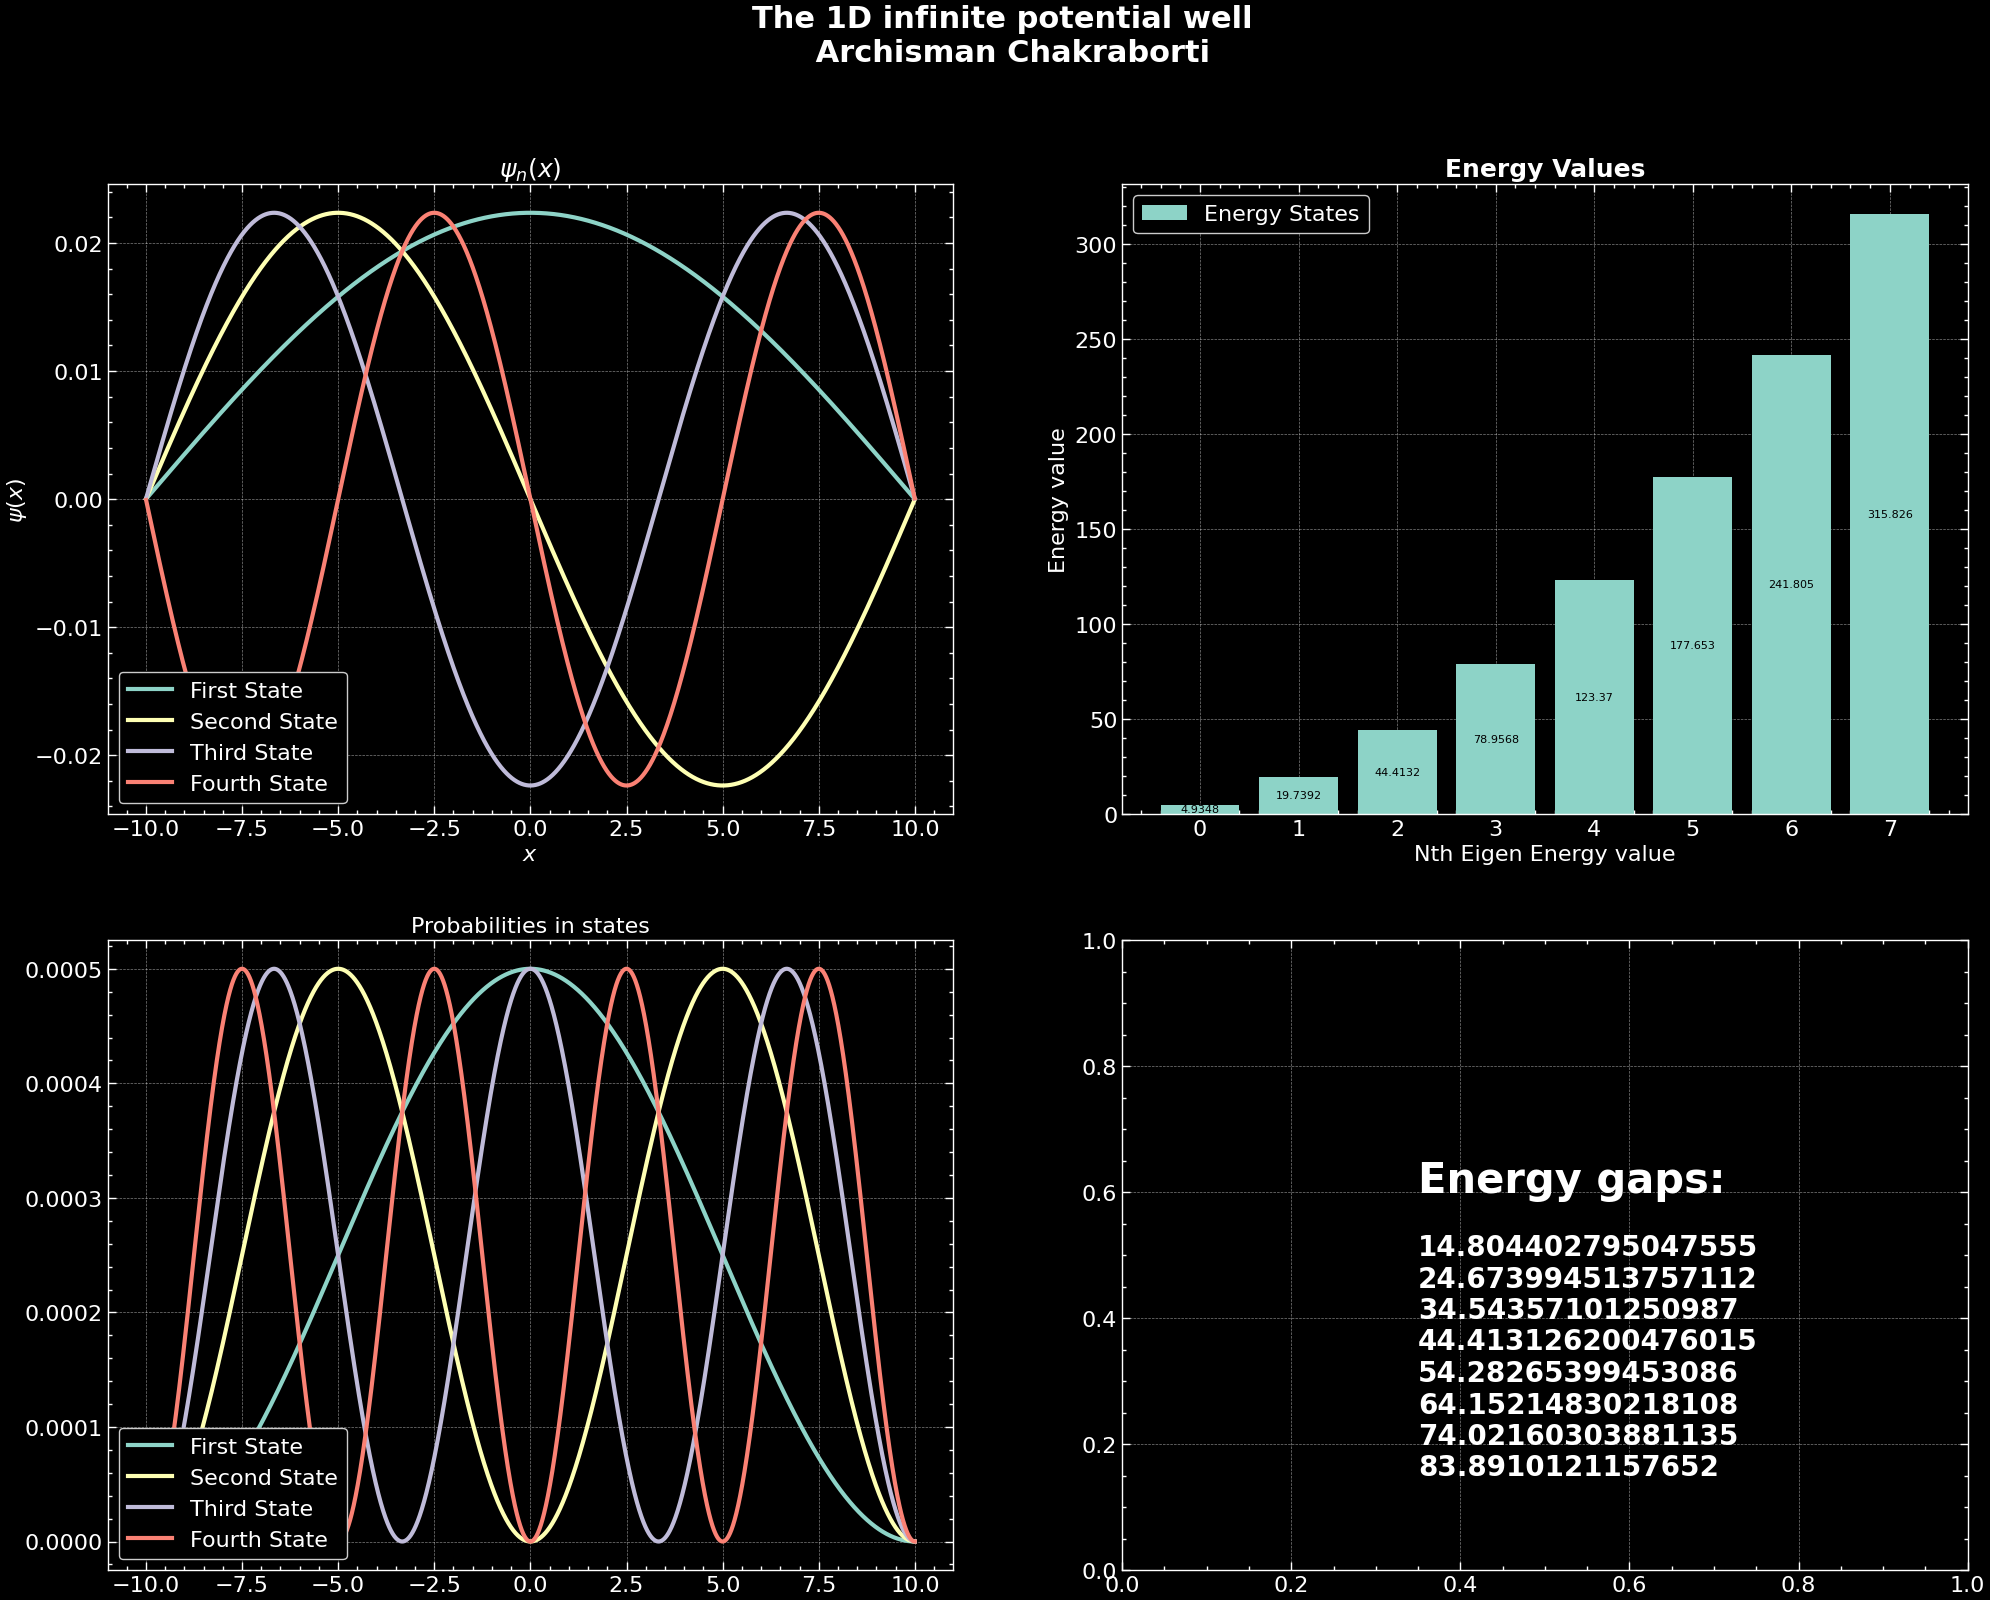

In [15]:
# Subplots
fig, ax = plt.subplots(2, 2, figsize = (24, 18))
ax1, ax2 = ax[0]
ax3, ax4 = ax[1]

# Plotting. We are plotting the first 4 states
ax1.plot(y[1:-1], v.T[0], lw = 3, label = "First State")
ax1.plot(y[1:-1], v.T[1], lw = 3, label = 'Second State')
ax1.plot(y[1:-1], v.T[2], lw = 3, label = 'Third State')
ax1.plot(y[1:-1], v.T[3], lw = 3, label = 'Fourth State')


ax3.plot(y[1:-1], v.T[0]**2, lw = 3, label = "First State")
ax3.plot(y[1:-1], v.T[1]**2, lw = 3, label = 'Second State')
ax3.plot(y[1:-1], v.T[2]**2, lw = 3, label = 'Third State')
ax3.plot(y[1:-1], v.T[3]**2, lw = 3, label = 'Fourth State')
ax3.set_title('Probabilities in states')
ax3.legend(loc = 3)
# axis labels
ax1.set_ylabel(r'$\psi(x)$', fontsize = 16)
ax1.set_xlabel(r'$x$', fontsize = 16)


# Energy bar charts
ax2.bar(np.arange(0,8, 1), w[:8], label = 'Energy States')
for bar in ax2.containers:
        ax2.bar_label(bar, label_type='center', fontsize = 8, color = 'black')
        
# Axis labels
ax2.set_xlabel('Nth Eigen Energy value')
ax2.set_ylabel('Energy value')


# Plot titles
ax1.set_title(r'$\psi_n(x)$', fontsize = 18, fontweight = 'bold')
ax2.set_title(r'Energy Values', fontsize = 18, fontweight = 'bold')

plt.suptitle('The 1D infinite potential well \n Archisman Chakraborti', 
             fontsize = 22, fontweight = 'bold')

conditions = rf'$\psi(0)$ = $\psi(N)$ = 0'
energy_gap = f'Energy gap = {w[1] - w[0]}'
ax4.text(0.35, 0.6, "Energy gaps:", fontsize = 30, fontweight = 'bold')
[ax4.text(0.35, 0.5 - pad/20, gap, fontsize = 20, fontweight = 'bold') 
 for pad, gap in enumerate(np.diff(w)[:8])]


# Legends
ax2.legend(loc = 'best')
ax1.legend(loc = 3)

plt.savefig('dikhawa.jpg')

The analystic formula for the energy eigen values of a 1D simple Harmonic oscillator is
$$E_n = \Big( n + \frac{1}{2}\Big)\hbar \omega$$
So, evidently, the energy gap is constant and is equal to   
$$ \Delta E = \hbar \omega $$
As we will see the energy gap in this method is quite constant for the first 15 states approximately. The later states seem to be having increasingly more energy gaps.  
Maybe, this can be attributed to the numeric nature of the method of of finding the second derivative.

**Energy gaps**

In [7]:
for gap in np.diff(w)[:23]:
    print(gap, end = '\n')
# We have 4000 energy states, we are just printing the first 23. 

141.42116092756612
141.4210046751877
141.42084842536298
141.4206921709672
141.4205359219293
141.42037966926125
141.4202234211417
141.42006726890736
141.41991398268124
141.4198208917844
141.42065307973553
141.4318268580471
141.52541731817882
142.06807548839015
144.1726688712647
149.48027258911907
158.43996917017375
169.64171020467757
181.4763242900799
193.17060951038593
204.5391944460016
215.60307956539555
226.42405936700789
